<a href="https://colab.research.google.com/github/FransArntz/WincAcademy/blob/main/assignment_retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://static.wincacademy.nl/logos/main-logo.png" height=200px style="height: 200px"/>

# Assignment: Retail

Congratulations! You've reached the final assignment for the course before the bonus modules. Here we'll ask you to work with a dataset from the Dutch *Centraal Bureau voor de Statistiek* (CBS, English: Statistics Netherlands). It contains monthly growth percentages for various branches of the retail sector. You'll be required to answer open questions as well as write code that handles the data and crunches numbers.

*Answer open questions as though you were writing a report. Answers that are too vague, too short or too sloppy will be rejected.*

## 0. Load required modules

First, we need to load some modules that we're going to use. Do that in the next code cell. If you don't know yet which modules you'll use, just read on and come back here to import them later. **Don't forget to run the cell whenever you make an edit!**

# Nieuwe sectie

In [1]:
import csv
import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate

## 1. Data Preparation
Now we need to load and parse the data. The data should be located in the same folder as this notebook (whether that's on Google Colab or your local machine). Make sure you have working file path from your notebook to the supplied `data.csv` file. Put an `x` in the checkbox below when you're ready.

- [X] *I have a working file path to the `data.csv` file.*

You are now ready to proceed with reading the data into your program.

### 1.1 Read the CSV

The data comes in the form of a `csv`-file. CSV stands for 'comma separated values'. Oddly enough it need not be the case that the values are *really* separated by commas. In this case, the **delimiter** - the character that separates the columns within a datapoint - is *not* a comma. It's up to you to inspect `data.csv` and find out what the delimiter is.

Once you know what the delimiter is, you can use Python's `csv` module to read each of the datapoints to a dictionary. Some tips:

- The module's name is `csv`.
- You can find its documentation [here](https://docs.python.org/3/library/csv.html)
- We suggest you use the `DictReader` class. There's an example on how to use `DictReader` in the linked documentation.
- Instead of printing the rows (like in the example), we suggest you store all the rows as `dict`s in a `list`.

**1. In the code cell below, write code that opens and reads the data. By the end of the cell, you should have a variable `data` that is a list of dictionaries that each contain a datapoint.**

In [2]:
with open('retail-data.csv', newline='') as csv_file:
    fieldnames='Industry', 'Periods', 'Revenue-Value', 'Revenue-Volume'
    reader=csv.DictReader(csv_file, fieldnames=fieldnames, delimiter=';')
    data_list=[]
    for row in reader:
        data_list.append(row)

data_list.pop(0)


OrderedDict([('Industry', 'Bedrijfstakken/branches (SBI 2008)'),
             ('Periods', 'Perioden'),
             ('Revenue-Value',
              'Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)'),
             ('Revenue-Volume',
              'Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)')])

### 1.2 Parse and clean the data

You now have a list of dictionaries that each contain some data. But what data? Answer the following questions to become familiar with this dataset. It requires you to write and execute Python code (you can add code cells if you wish), and also search the web for terms you're not familiar with.

**2. What are the column names in this dataset, and what do they mean? Be specific.**

---

"Industry"/"Bedrijfstakken/branches (SBI 2008)": Indeling van bedrijfstakken/branches volgens de SBI 2008.
"SBI 2008": De Standaard Bedrijfsindeling (SBI) is een hiërarchische indeling van economische activiteiten die het CBS onder meer gebruikt om bedrijfseenheden in te delen naar hun hoofdactiviteit. Laatste herziening is uit 2008.

"Periods"/"Perioden": de periode waarover de data zijn berekend, in dit geval de omzet voor een bepaalde maand uit een bepaald jaar.

"Revenue-Value"/"Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)":
"Omzet": Opbrengst uit verkoop van goederen en levering van diensten aan derden.
"Ongecorrigeerd": Uitkomsten die niet zijn gecorrigeerd voor koopdag- en/of seizoeneffecten. 
"Indexcijfers": Cijfer t.o.v. de index.
"Waarde": De waarde van een variabele. De waarde kan worden opgesplitst in een prijs en een volume.
"2015=100": Basisjaar is 2015 en het basisindexcijfer is 100. 

"Revenue-Volume"/"Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)": 
"Omzet": Opbrengst uit verkoop van goederen en levering van diensten aan derden. 
"Ongecorrigeerd": Uitkomsten die niet zijn gecorrigeerd voor koopdag- en/of seizoeneffecten.
"Indexcijfers": Cijfer t.o.v. de index.
"Volume": Het gewogen gemiddelde van de hoeveelheid en de kwaliteit van de onderdelen van een bepaalde goederen- of dienstentransactie of salditransactie.
"2015=100": Basisjaar is 2015 en het basisindexcijfer is 100. 

**3. For each column, list what data type it should have (`str`, `int`, `float` or `datetime.date`).**

"Industry"/"Bedrijfstakken/branches (SBI 2008)": 'str'.

"Periods"/"Perioden": 'datetime.date'

"Revenue_Value"/"Omzet ongecorrigeerd/Indexcijfers/Waarde (2015=100)": 'float'. 

"Revenue-Volume"/"Omzet ongecorrigeerd/Indexcijfers/Volume (2015=100)": 'float. 

    
**4. In the code cell below, write code that changes the column names to something more convenient for writing readable code. Be sure to choose English, correct and meaningful names.**

In [3]:
# Zie 1.1. Fieldnames is changed column names: 'Industry', 'Periods', 'Revenue-Value', 'Revenue-Volume'.

**5. In the code cell below, write code that casts all the data to the right type.**

Tips:
- If you overwite your data, running the casting operation you're about to implement more than once might result in errors. In that case you can opt not to reuse a variable or restart and rerun your notebook for every retry.
- The data is in Dutch. For some columns this does not matter, but for one in particular it makes parsing it a little bit harder. There is a way to handle this in a few lines of code. You'll need Python's `locale` module for this, as well as the special string `'nl_NL.UTF-8'`. If you're not sure how to use this information after searching the web for a while, it's OK to take the long way around and write custom code to handle the Dutch words.
- The parsing script is bound to run into errors. **Do not modify the data file on disk.** Carefully read the error, examine why it works on most values and crashes on some others, and apply a fix in your code! We'll give you some tips:
    - A handful of values in the `Perioden`-column might cause an error due to an unexpected character. You can safely ignore that character.
    - Handle missing numerical values by replacing them with `-1.`. Be sure to maintain the correct datatype for that column!

In [4]:
for m in data_list:
    month_uk=m['Periods'].replace('januari', 'January').replace('februari', 'February').replace('maart', 'March').replace('april', 'April').replace('mei', 'May').replace('juni', 'June').replace('juli', 'July').replace('augustus', 'August').replace('september', 'September').replace('oktober', 'October').replace('november', 'November').replace('december', 'December')
    m['Periods']=month_uk
    month_uk=m

for d in data_list:
    try:
        clean_date=d['Periods'].replace('*', '').replace(' ','')
        d['Periods']=clean_date
        nice_date=list(clean_date)
        nice_date.insert(4, " ")
        nice_date=''.join(nice_date)
        d['Periods']=nice_date
        renamed_date=datetime.strptime(nice_date, '%Y %B').date()
        add_space=renamed_date
    except Exception as e:
        print(repr(e))
 
for row in data_list:
    r_value=row['Revenue-Value']
    r_volume=row['Revenue-Volume']
    r_value_strip=r_value.strip()
    r_volume=r_volume.strip()
    r_value_num=(r_value_strip[-1])
    r_volume_num=(r_volume[-1])
    if r_value_num.isnumeric() == False:
        r_value_replaced=r_value_strip.replace('.','-1.')
        row['Revenue-Value']=r_value_replaced
    if r_volume_num.isnumeric() == False:
        r_volume_replaced=r_volume.replace('.', '-1.')
        row['Revenue-Volume']=r_volume_replaced


## 2. Data Exploration

You are now ready to explore the data.

**6. In the code cell below, print the following metadata. Format the printed text in a nice and tidy way. Put an `x` in the checkboxes when you've succeeded.**

- [X] **The number of datapoints in the dataset.**
- [X] **The number of unique branches of the retail sector the data covers.**
- [X] **The first month covered by the data.**
- [X] **The last month covered by the data.**

In [5]:
print('The number of datapoints in the dataset is '+str(len(data_list)*len(row))+'.')

branch_list=[]
for row in data_list:
    branch=row['Industry']
    if branch in branch_list:
        continue
    else:
        branch_list.append(branch)
noub=len(branch_list)        
print(f'The number of unique branches is {noub}.')
 
pmin=('3000 April')
pmin=datetime.strptime(pmin, '%Y %B')
for row in data_list:
    temp=datetime.strptime(row['Periods'], '%Y %B')
    if temp < pmin:
        pmin = temp
minmy=pmin.strftime('%B %Y')       
print(f'The first month in the dataset is {minmy}.')


pmax=('1000 January')
pmax=datetime.strptime(pmax, '%Y %B')
for row in data_list:
    temp=datetime.strptime(row['Periods'], '%Y %B')
    if temp > pmax:
        pmax = temp
maxmy=pmax.strftime('%B %Y')       
print(f'The last month in the dataset is {maxmy}.')


The number of datapoints in the dataset is 12480.
The number of unique branches is 16.
The first month in the dataset is January 2005.
The last month in the dataset is March 2021.


**7. In the code cell below, extract the revenue numbers for the following two sectors and put them in a list named exactly as indicated. Also create a list that contains all the months in ascending order. Run the cell after it to see a plot of the numbers if you did it correctly.**

- [X] Months in ascending order $\Longrightarrow$ `months`
- [X] Clothing stores $\Longrightarrow$  `clothing_stores_revenue`
    - Tip: the Dutch word for *'clothing'* is *'kleding'*
- [X] Mail order companies and web shops $\Longrightarrow$ `mail_order_revenue`
    - Tip: the Dutch term for *'mail order companies'* is *'postorderbedrijven'*

In [6]:
months=[]
for row in data_list:
    month_year=row['Periods']
    if month_year in months:
        continue
    else:
        months.append(month_year)
        
clothing_stores_revenue=[]
for row in data_list:
    if 'kleding' in row['Industry']:    
        cloth_value=row['Revenue-Value']
        clothing_stores_revenue.append(cloth_value)

mail_order_revenue=[]
for row in data_list:
    if 'Postorderbedrijven' in row['Industry']:    
        mail_value=row['Revenue-Value']
        mail_order_revenue.append(mail_value)


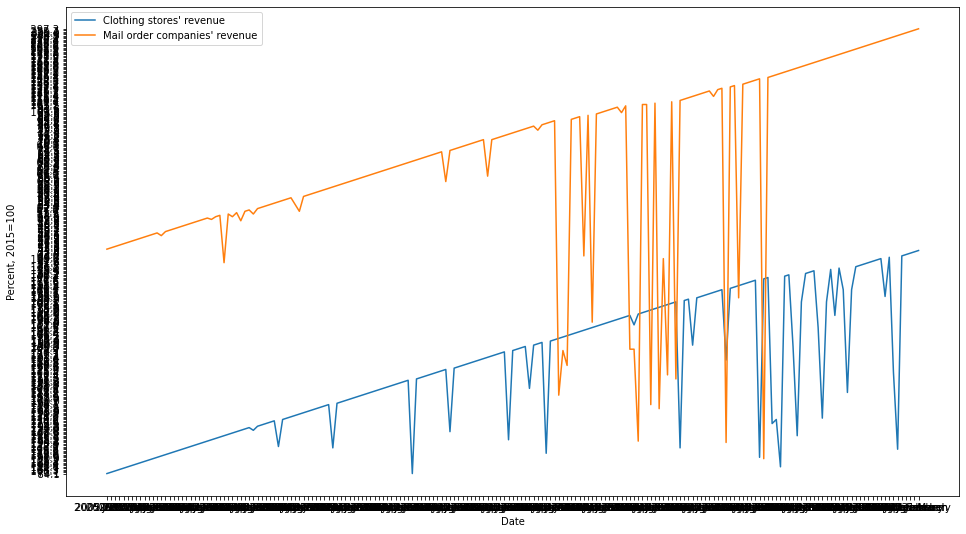

In [7]:
# Do not modify the code in this cell.
import matplotlib.pyplot as plt
%matplotlib inline

try:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(months, clothing_stores_revenue, label="Clothing stores' revenue")
    ax.plot(months, mail_order_revenue, label="Mail order companies' revenue")
    ax.set_xlabel('Date')
    ax.set_ylabel('Percent, 2015=100')
    ax.legend()
    plt.show()
except Exception as e:
    print('There was an error creating the plot.\n'
          'Check if your lists are correctly named and assembled.\n'
          "Here's your error, for your debugging pleasure.")
    raise e

**8. How do the two branches compare? Discuss any yearly cycles you observe, as well as long-term developments. Also explain why you think these patterns are there. Pretend you are writing this to your supervisor or a client who asked you to analyze this dataset.**

Voor de "clothing stores" zijn er seizoensgebonden dalende en stijgende lijnen te zien in de jaarlijkse cycli. Voor de "mail order companies" zijn er geen duidelijke seizoensgebonden dalende en stijgende lijnen te zien in de jaarlijkse cycli. Voor beide branches zijn er sterk dalende en stijgende lijnen te zien in bepaalde jaren (perioden) vanwege positieve of negatieve sociale en economische omstandigheden. Bijvoorbeeld de periode van de coronamaatregelen is zichtbaar in dat de "mail order companies" een ononderbroken stijgende lijn laten zien en de "clothing stores" een sterk stijgende en dalende lijn laten zien anders dan alleen seizoensgebonden.

Beide branches laten op lange termijn een stijgende lijn voor de omzetwaarde zien. 

## 3. Computing With Data

### 3.1 Year Over Year Change

Let's take a closer look at these two branches of retail: clothing stores and mail order companies. A commonly used metric in business is the year-over-year revenue change. It is computed like so:

$$\text{YoY}_\text{month} = \frac{\text{Revenue}_\text{month}}{\text{Revenue}_\text{same month last year}} \times 100$$

Search the web for a longer explanation of this term if you'd like one.

**9. Why should we compare revenue for a particular month to the revenue of that same month, one year ago?**

We vergelijken de omzet van een specifieke maand dit jaar met dezelfde maand een jaar geleden om eventuele seizoensinvloeden er uit te filteren. Nu zien we de tend over de jaren. 

**10. In the code cell below, compute the year-over-year revenue change for every month, for both branches of the retail sector, each in their own new list. Skip the first year (why?). Put an `x` in the checkboxes when you're ready. Run the next cell to see a new plot for your data.**

- [X] Clothing stores $\Longrightarrow$ `clothing_stores_yoy`
- [X] Mail order companies $\Longrightarrow$ `mail_order_yoy`



In [8]:
clothing_stores_yoy=[]
for i in range(12,len(months)):
    yoy=(float(clothing_stores_revenue[i])/float(clothing_stores_revenue[i-12]))*100
    clothing_stores_yoy.append(yoy)


mail_order_yoy=[]
for i in range(12,len(months)):
    yoy=(float(mail_order_revenue[i])/float(mail_order_revenue[i-12]))*100
    mail_order_yoy.append(yoy)


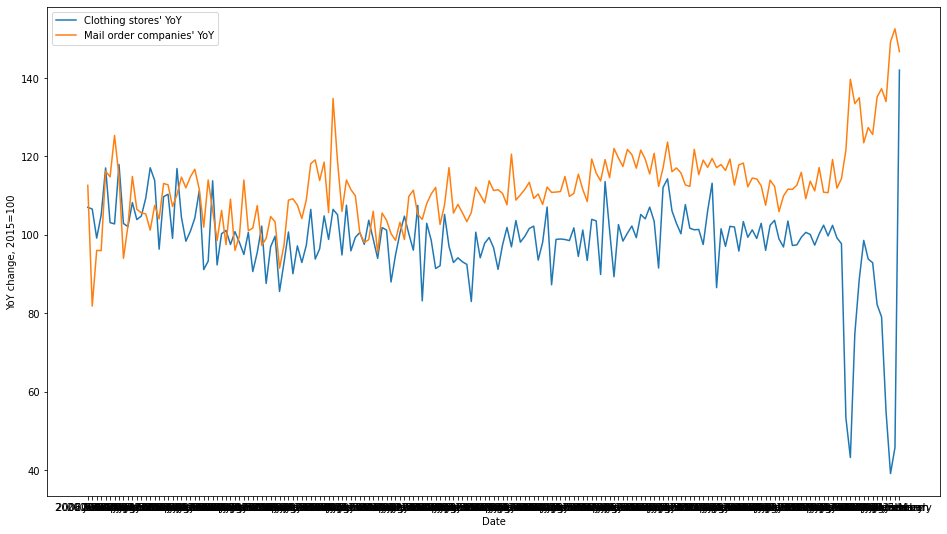

In [9]:
try:
    fig, ax = plt.subplots(figsize=(16, 9))
    ax.plot(months[12:], clothing_stores_yoy, label="Clothing stores' YoY")
    ax.plot(months[12:], mail_order_yoy, label="Mail order companies' YoY")
    ax.set_xlabel('Date')
    ax.set_ylabel('YoY change, 2015=100')
    ax.legend()
    plt.show()
except Exception as e:
    print('There was an error creating the plot.\n'
          'Check if your lists are correctly named and assembled.\n'
          "Here's your error, for your debugging pleasure.")
    raise e

**11. In the code cell below, find the best and worst months for both branches of the retail sector in terms of year-over-year revenue change. Print the branch, month and YoY in a nice and tidy way.**

In [10]:
for i in range(len(clothing_stores_yoy)):
    min_yoy = min(clothing_stores_yoy)
    if clothing_stores_yoy[i] == min_yoy:
        min_month=months[i]
print(f'De slechtste maand vergeleken jaar op jaar voor de branche Clothing stores is {min_month} met een indexcijfer van {min_yoy} waarbij 2015=100.')

for i in range(len(clothing_stores_yoy)):
    max_yoy = max(clothing_stores_yoy)
    if clothing_stores_yoy[i] == max_yoy:
        max_month=months[i]
print(f'De beste maand vergeleken jaar op jaar voor de branche Clothing stores is {max_month} met een indexcijfer van {max_yoy} waarbij 2015=100.')

for i in range(len(mail_order_yoy)):
    min_yoy = min(mail_order_yoy)
    if mail_order_yoy[i] == min_yoy:
        min_month=months[i]
print(f'De slechtste maand vergeleken jaar op jaar voor de branche Mail order companies is {min_month} met een indexcijfer van {min_yoy} waarbij 2015=100.')

for i in range(len(mail_order_yoy)):
    max_yoy = max(mail_order_yoy)
    if mail_order_yoy[i] == max_yoy:
        max_month=months[i]
print(f'De beste maand vergeleken jaar op jaar voor de branche Mail order companies is {max_month} met een indexcijfer van {max_yoy} waarbij 2015=100.')


De slechtste maand vergeleken jaar op jaar voor de branche Clothing stores is 2020 January met een indexcijfer van 39.07514450867052 waarbij 2015=100.
De beste maand vergeleken jaar op jaar voor de branche Clothing stores is 2020 March met een indexcijfer van 142.02334630350194 waarbij 2015=100.
De slechtste maand vergeleken jaar op jaar voor de branche Mail order companies is 2005 February met een indexcijfer van 81.81818181818183 waarbij 2015=100.
De beste maand vergeleken jaar op jaar voor de branche Mail order companies is 2020 February met een indexcijfer van 152.5656324582339 waarbij 2015=100.


### 3.2 Similarity Between Branches

We've seen that the pattern for revenue is quite different for clothing stores and mail order companies. In other words: their revenues don't move up or down together. A way to make this observation more specific is to compute the **correlation coefficient**. It is a number between $-1$ and $1$ that describes the relation between two *random variables*. Here is how it works applied to our revenue numbers:

- If the correlation coefficient for the revenue of two branches of the retail sector is $1$, their revenue is *positively correlated*. This means that when the revenue of branch A goes up, the revenue of branch B also goes up. In other words: the revenues for both branches go up together.
- If the correlation coefficient is $-1$, the revenues of the two branches are *negatively correlated*. This means that if A's revenue goes up, B's revenue goes down. Similarly, if B's revenue goes up, A's revenue goes down. They move in the exact opposite direction.
- If the correlation coefficient is $0$, there is no clear pattern between the revenues of both branches.

Here's a table that summarizes this information:

| Correlation coefficient | Meaning                              |
|-------------------------|--------------------------------------|
| $1$                     | Revenues go up together              |
| $0$                     | No pattern                           |
| $-1$                    | Revenues move in opposite directions |

Note that there is a continuous scale between $-1$ and $1$! A correlation coefficient of $0.3$ indicates a somewhat positively correlated relationship.

And here's an image that visualizes the correlation coefficient.

<img src="https://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg"/>

We've provided a function `corrcoef` that computes the correlation coefficient for two lists.

**11. In the code cell below, use the function `corrcoef` to compute the correlation coefficient for each pair of branches in our dataset. Then print a sorted table that shows each unique pair and their correlation coefficients. You can take inspiration from this table (but it doesn't have to look exactly like it):**

```
Coeff   Branch A                                          Branch B                                          
===========================================================================================================
0.98    4711, 472 Winkels in voedingsmiddelen             4711 Supermarkten                                 
0.91    475 Winkels in overige huishoudwaren              4752 Winkels in doe-het-zelfartikelen             
0.91    47528 Bouwmarkten                                 4752 Winkels in doe-het-zelfartikelen               
```

In [11]:
import numpy as np
from tabulate import tabulate

# Provided function. Use this to obtain the correlation coefficient for two lists.
def corrcoef(branch_a, branch_b):
    return np.corrcoef(branch_a, branch_b)[0, 1]

corr_table=list()
for i in range(len(branch_list)):
  branch_name_a=branch_list[i]  
  list_val_a=list()
  for row_i in data_list:
    if row_i['Industry'] == branch_name_a:
      list_val_a.append(float(row_i['Revenue-Value']))
  for j in range(i+1,len(branch_list)):
    branch_name_b=branch_list[j]   
    list_val_b=list()
    if branch_name_a != branch_name_b:
      for row_j in data_list:
        if row_j['Industry'] == branch_name_b:
          list_val_b.append(float(row_j['Revenue-Value']))
      temp=[corrcoef(list_val_a, list_val_b), branch_name_a, branch_name_b]
      corr_table.append(temp)
corr_table.sort(reverse=True)
print(tabulate(corr_table, headers=['Corr Coeff', 'Branche A', 'Branche B']))


  Corr Coeff  Branche A                                 Branche B
------------  ----------------------------------------  ----------------------------------------
  0.9841      4711, 472 Winkels in voedingsmiddelen     4711 Supermarkten
  0.912311    475 Winkels in overige huishoudwaren      4752 Winkels in doe-het-zelfartikelen
  0.907017    4752 Winkels in doe-het-zelfartikelen     47528 Bouwmarkten
  0.886558    475 Winkels in overige huishoudwaren      4759 Winkels overige huishoudartikelen
  0.87273     4771 Winkels in kleding                   4772 Winkels in schoenen en lederwaren
  0.86919     4711 Supermarkten                         4791 Postorderbedrijven, webwinkels
  0.858624    4711, 472 Winkels in voedingsmiddelen     47741 Drogisterijen
  0.8446      4719, 474-477 Winkels in non-foodart.     4759 Winkels overige huishoudartikelen
  0.840273    Winkels in meubels, woninginrichting alg  4759 Winkels overige huishoudartikelen
  0.84004     4711, 472 Winkels in voedingsmidd

**12. Pick two correlation coefficients from the table you created and explain why you think these values are the way that they are. Be sure to pick two coefficients that are not close to each other.**

Voor 4772 Winkels in schoenen en lederwaren en Postorderbedrijven, webwinkels is de correlatiecoëfficient -0.61. Deze twee branches hebben een significante negatieve correlatie voor de omzetwaarde. Blijkbaar is het zo dat als er meer wordt gekocht bij een postorderbedrijf er minder wordt gekocht bij een winkel in schoenen, en omgekeerd.

Voor 4711, 472 Winkels in voedingsmiddelen en 4711 Supermarkten is de correlatiecoëfficient 0.98. Deze twee branches hebben een significante positieve correlatie voor de omzetwaarde. Blijkbaar is het zo dat als er meer wordt gekocht in een winkels in voedingsmiddelen en er ook meer wordt gekocht in supermarkten en hetzelfde als er minder wordt gekocht.     

**13. Imagine you are a very risk-averse investor shaping your portfolio of investments in the retail sector. How would you use the information in the table you created to minimize your investment risk? Which two branches of the retail sector would you invest in if you had to pick two? Use the correlation coefficient in your answer.**

Als investeerder heb ik van de detailhandel branches de "winkels in schoenen en lederwaren" en "postorderbedrijven, webwinkels" opgenomen in mijn portefeuille. Ik wil mijn investeringsrisico spreiden en heb deze twee branches opgenomen in mijn portefeuille omdat deze twee branches een significante negatieve correlatie voor de omzetwaarde hebben. Hiermee heb ik mijn investeringsrisco gespreid omdat als voor de ene branche de omzetwaarde omlaag gaat de omzetwaarde voor de andere branche omhoog gaat. Uitgaande van een stijgende lijn op lange termijn voor de omzetwaarde van de totale detailhandel branche heb ik weinig risico dat de waarde van mijn investering zal dalen en is een bescheiden toename waarschijnlijker.         

## 4. Conclusion

You made it! This was the Retail assignment. Before you hand it in: restart the kernel and run all the cells. Then save it to GitHub and share the link with us in the usual way.